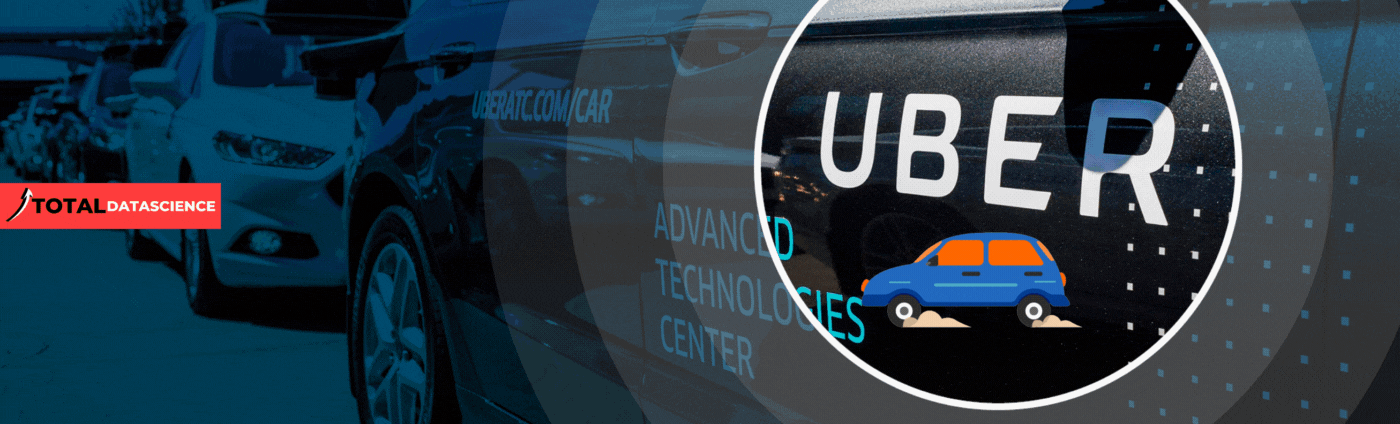

# **Uber Data Analysis With Python**



**Uber Technologies, Inc.**, commonly known as **Uber**, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.

We will mainly use data regarding Uber ridede.**We will be using Python to analyze data from Uber in order to achieve insights on the following key points:

   Check how long do people travel with Uber?*   What Hour Do Most People Take Uber To Their Destination?
* Check The Purpose Of Trips
* Which Day Has The Highest Number Of Trips
* What Are The Number Of Trips Per Each Day?
* What Are The Trips In The Month
* The starting points of trips. Where Do People Start Boarding Their Trip From Most?




# **Import The Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [3]:
data=pd.read_csv('Uber_Drives.csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## Check for Mising Values

If a data is not available, Python uses **NaN** to represnet it.

Let's check below if there data points missing in our dataset.

In [4]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [5]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
data.dropna(inplace = True)

In [7]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

### Now we can see that there are not missing values in the dataset.

In [8]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format="%m/%d/%Y %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format="%m/%d/%Y %H:%M")

In [9]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [10]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


## Categories we have

In [15]:
data['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='CATEGORY*'>

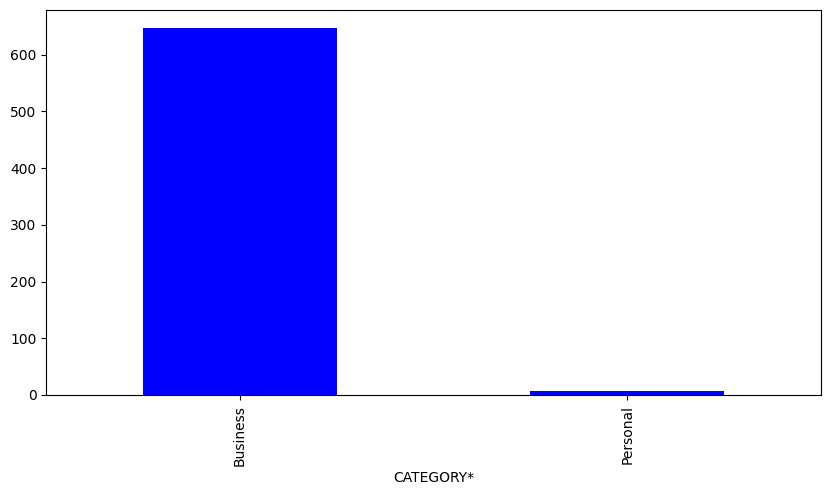

In [22]:
# data['CATEGORY*'].value_counts().plot(kind ='bar', figsize(10,5), color ='red')
# data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

data['CATEGORY*'].value_counts().plot(kind='bar', figsize=(10,5), color ='blue')

We have large number of business rides caegory as against very few personal rides.

## **How long do people travel with Uber?**


<Axes: ylabel='Frequency'>

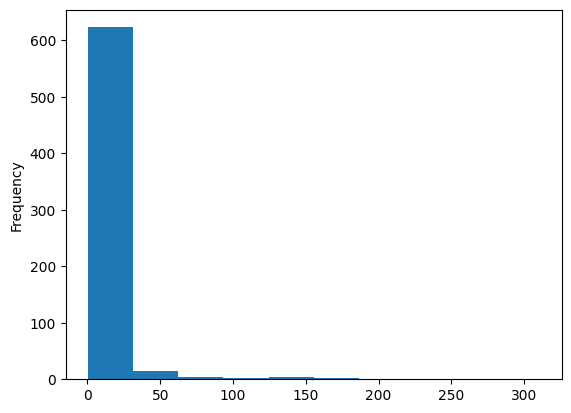

In [23]:
data['MILES*'].plot.hist()

mostly people travel in a short mile with Uber.

## **What Hour Do Most People Take Uber To Their Destination?**


Text(0.5, 1.0, 'Number of trips Vs hours')

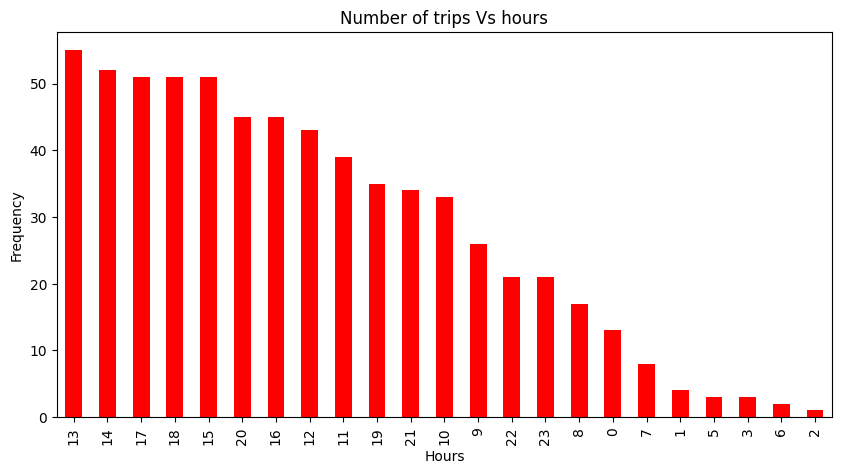

In [24]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

As we can see most people take Uber to their destination around the 13th hour(1pm) and the least hour is 2 am.

# **Check The Purpose Of Trips**

<Axes: xlabel='PURPOSE*'>

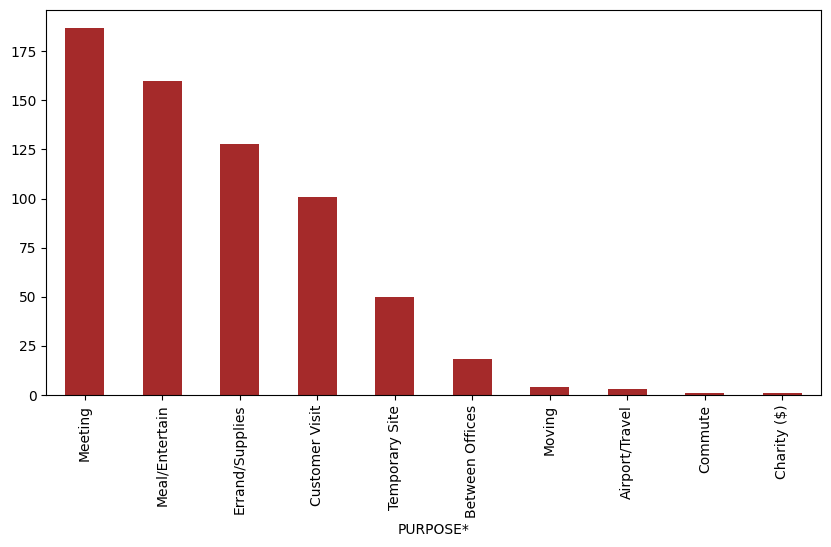

In [25]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

We can notice that mostly the purpose of the trip is meeting and meal/entertain.

## **Which Day Has The Highest Number Of Trips**

<Axes: xlabel='WEEKDAY'>

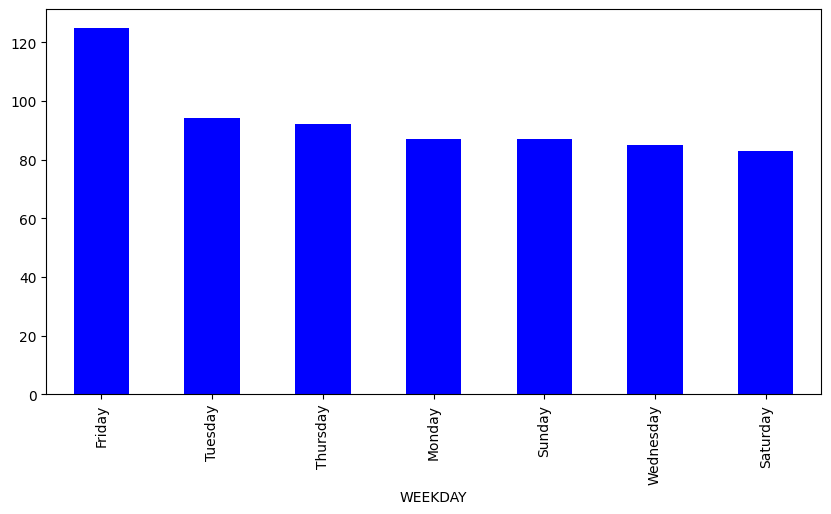

In [26]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

So Friday has the highest number of Trips.

## **What Are The Number Of Trips Per Each Day?**

<Axes: xlabel='DAY'>

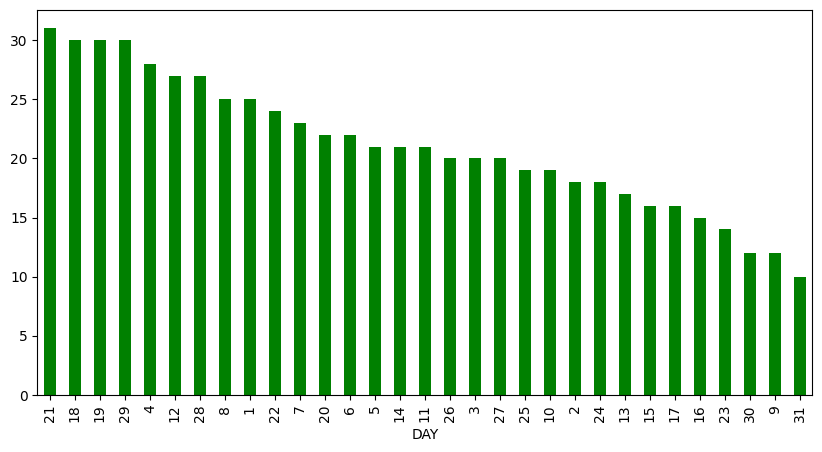

In [27]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

## **What Are The Trips In The Month**

<Axes: xlabel='MONTH'>

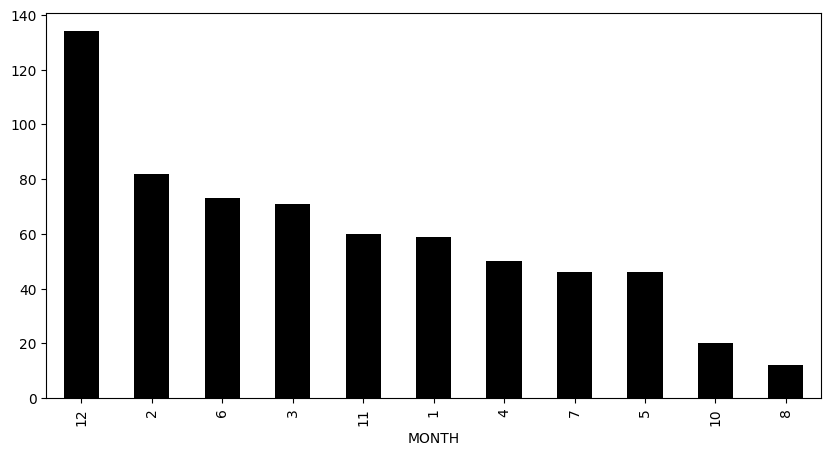

In [28]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='black')

We can see that December(12) has the most trips.

## **The starting points of trips. Where Do People Start Boarding Their Trip From Most?**

<Axes: xlabel='START*'>

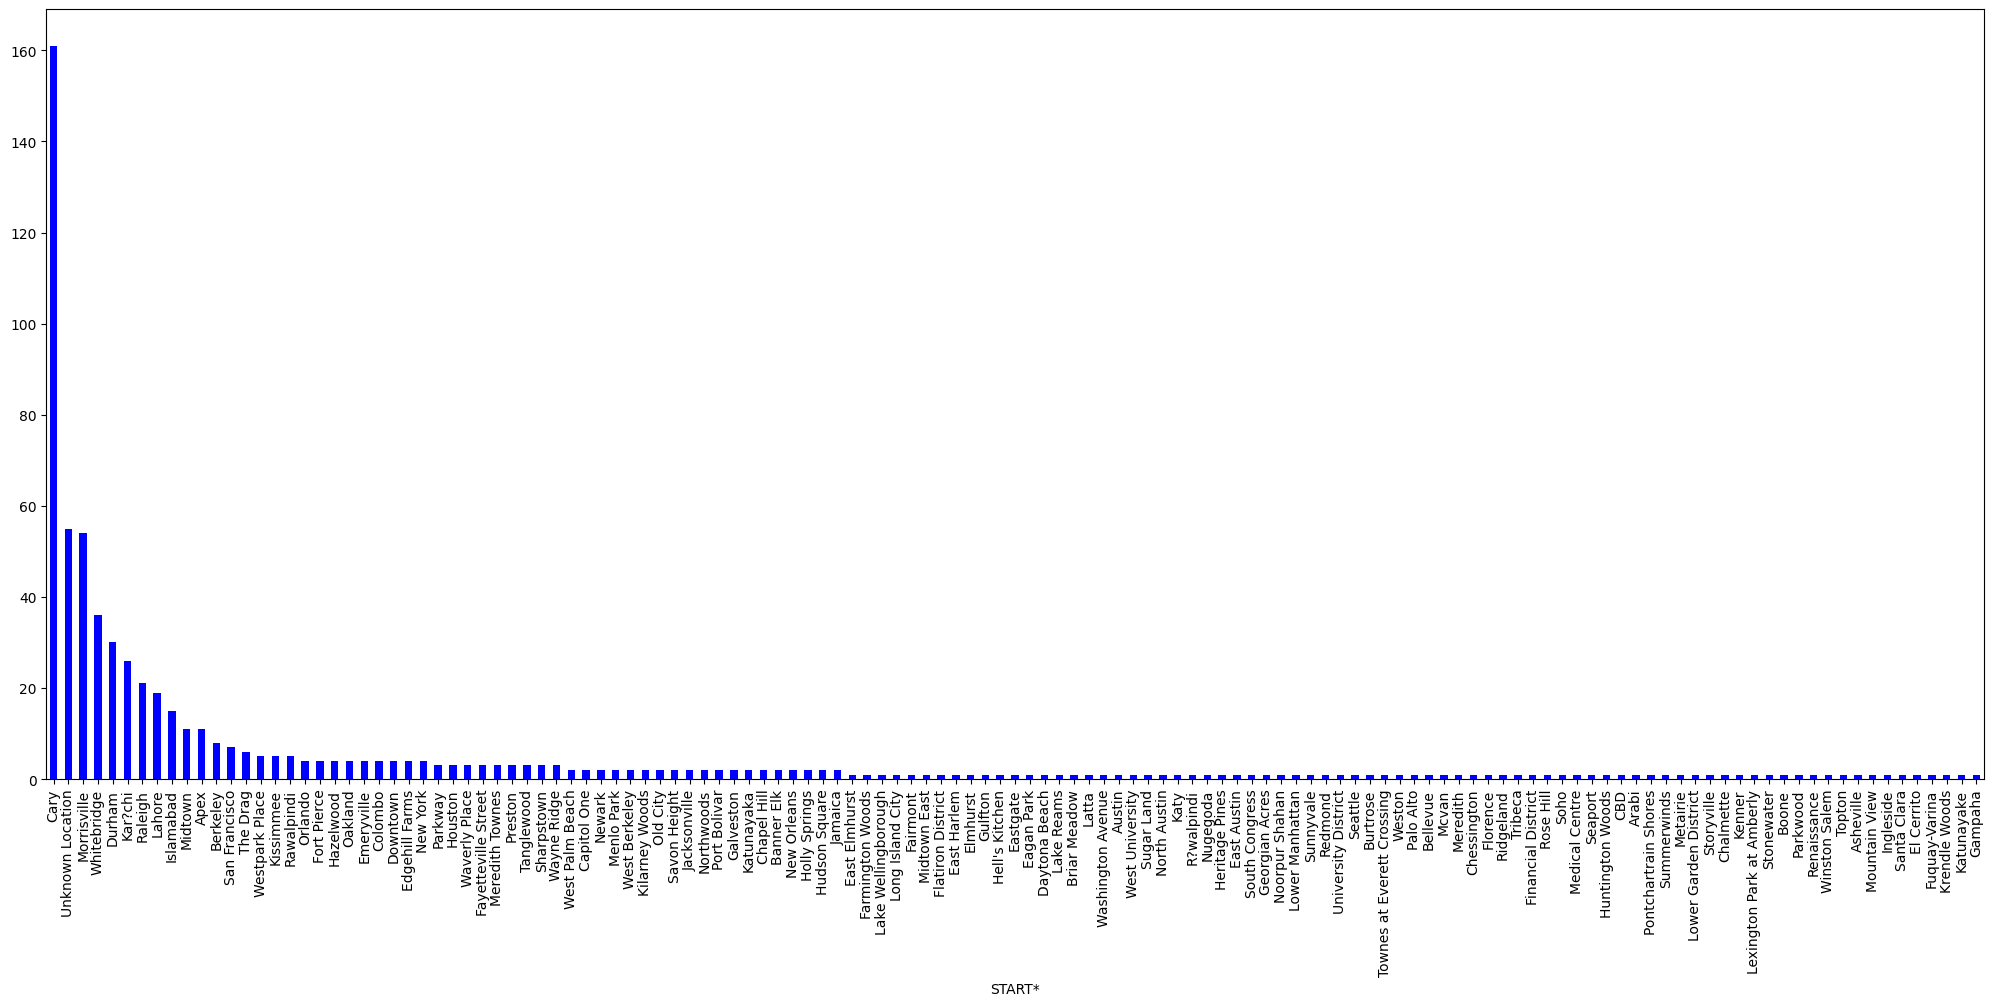

In [29]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

Most people in this dataset starts their journey from Cary followed by m

some unknown location and then Morrisville.